Overview
This project aims to analyze aviation accidents dataset to identify the types of aircrafts that 
are more prone to accidents and determine safest and lowrisk aricrfats for purchase

In [272]:
# Importing modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
#loading the datasets 
aviation_data = pd.read_csv('AviationData.csv', sep = "," , encoding = 'latin-1')
aviation_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_27020\2493569104.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('AviationData.csv', sep = "," , encoding = 'latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Data Understanding 
1.Checking data frame for missing values 

2.Calculating number of missing values in each column

3.Dropping columns with more than 80% missing values 

In [274]:
#checking data frame,data types there are 5 float data sets and 25 categorical data 
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [275]:
# check null values in aviation_data dataframe and converting to percentage to better understand our dataframe 
missing_percentage = np.round(aviation_data.isnull().sum()/len(aviation_data)*100, 1)
missing_percentage

Event.Id                   0.0
Investigation.Type         0.0
Accident.Number            0.0
Event.Date                 0.0
Location                   0.1
Country                    0.3
Latitude                  61.3
Longitude                 61.3
Airport.Code              43.6
Airport.Name              40.7
Injury.Severity            1.1
Aircraft.damage            3.6
Aircraft.Category         63.7
Registration.Number        1.6
Make                       0.1
Model                      0.1
Amateur.Built              0.1
Number.of.Engines          6.8
Engine.Type                8.0
FAR.Description           64.0
Schedule                  85.8
Purpose.of.flight          7.0
Air.carrier               81.3
Total.Fatal.Injuries      12.8
Total.Serious.Injuries    14.1
Total.Minor.Injuries      13.4
Total.Uninjured            6.7
Weather.Condition          5.1
Broad.phase.of.flight     30.6
Report.Status              7.2
Publication.Date          15.5
dtype: float64

In [276]:
#checking number of rows and columns in data set (32 columns and 5423 rows)
aviation_data.shape

(88889, 31)

In [277]:
#removing columns with more than 80% missing values 
aviation_data.drop(['Air.carrier', 'Schedule'], axis = 'columns', inplace = True)


In [278]:
#checking if columns were removed 
aviation_data.shape

(88889, 29)

In [279]:
#removing period from column names 
(aviation_data.columns.str.replace('.', ' '), inplace := True)

(Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
        'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
        'Airport Name', 'Injury Severity', 'Aircraft damage',
        'Aircraft Category', 'Registration Number', 'Make', 'Model',
        'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description',
        'Purpose of flight', 'Total Fatal Injuries', 'Total Serious Injuries',
        'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
        'Broad phase of flight', 'Report Status', 'Publication Date'],
       dtype='object'),
 True)

In [280]:
#check for dulpicates 
#no dulpicates in the data set
aviation_data.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool>

## Univariate Data Analysis
Check the statistical summaries of our dataset. Checking the mean,median,mode, variance and standard deviation of our variables of interest.

In [281]:
#Calculating summary statistics for the data seta
# use parameter include="all" to include categorical variables 
aviation_data.describe(include = "all")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,32023,82697,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,31,26,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001214X45071,Accident,ERA22LA103,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,091,Personal,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,18221,49448,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


From the summary statistics we can denote that the average number of people /injuries per flight are
Total Fatal Fatalities: 1
Total Fatal Injuries: 1	
Total Serious Injuries:0.2	
Total Minor Injuries:0.3	
Total Uninjured:5.3
Total injured:1


In [282]:
#creating a new column with total injuries 
aviation_data['Tota Injuries'] = aviation_data['Total.Serious.Injuries'] + aviation_data['Total.Minor.Injuries']
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Tota Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,NaN


In [283]:
#calculate the average number of injuries 
# Average number of injuries 1 person with maximum of 189 people injured in one accidents/incident  
aviation_data['Tota Injuries'].describe() 


count    74836.000000
mean         0.565530
std          2.515732
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        189.000000
Name: Tota Injuries, dtype: float64

In [284]:
#identifying the top ten locations with highest accidents 
top_10_locations = aviation_data['Location'].value_counts().head(10)
top_10_locations_count = list(top_10_locations.index)
top_10_locations_name = list(top_10_locations.values)


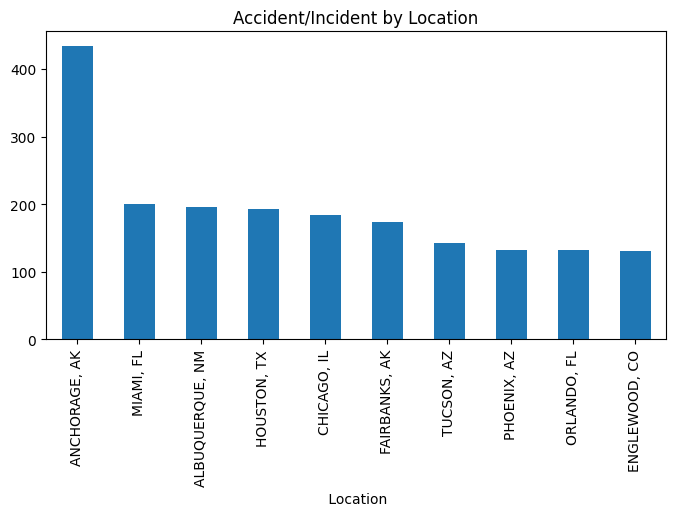

In [314]:
#plotting graph showing top ten locations with highest incidents/accidents 
top_10_locations.plot(kind = 'bar', xlabel= ' Location', title= 'Accident/Incident by Location', figsize = (8,4));
plt.show()

Highest accidents occured in anchorage Ak followed by Miami and Albuquerque

In [286]:
#filter columns where we want to plot graphs  
new_aviation = aviation_data.loc[:,['Engine.Type','Number.of.Engines','Aircraft.Category']]
new_aviation

,Engine.Type,Number.of.Engines,Aircraft.Category
0,Reciprocating,1.0,NaN
1,Reciprocating,1.0,NaN
2,Reciprocating,1.0,NaN
3,Reciprocating,1.0,NaN
4,NaN,NaN,NaN
...,...,...,...
88884,NaN,NaN,NaN
88885,NaN,NaN,NaN
88886,NaN,1.0,Airplane
88887,NaN,NaN,NaN


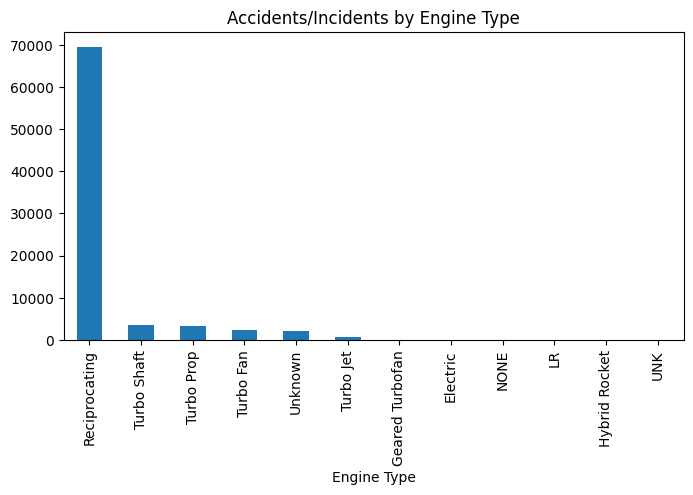

In [315]:
#plotting engine type with most incidents
#From the graph recriprocating engines have the highest accidents/engines recorded
Engine_Type = aviation_data['Engine.Type'].dropna()
Engine_Type_counts = aviation_data['Engine.Type'].value_counts()
Engine_Type_counts
Engine_Type_counts.plot(kind = 'bar', figsize=(8,4),xlabel= 'Engine Type' , title= 'Accidents/Incidents by Engine Type');
plt.show()

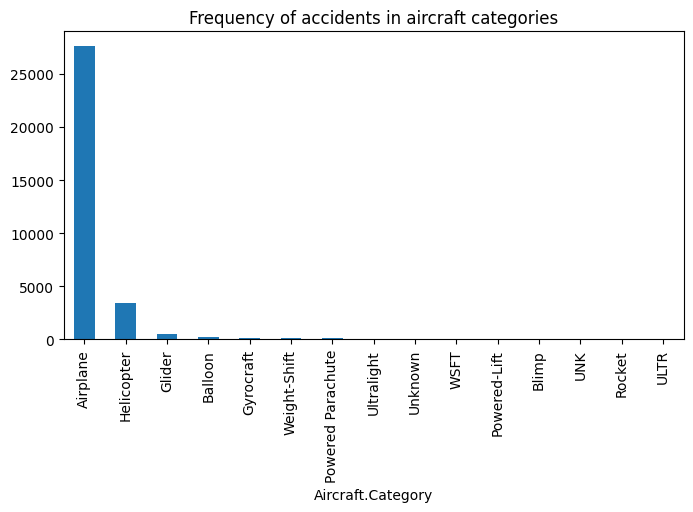

In [316]:
Aircraft_category = aviation_data['Aircraft.Category'].value_counts()
Aircraft_category.plot(kind = 'bar', title= 'Frequency of accidents in aircraft categories', figsize=(8,4));
plt.show()

Most accidents/indcidenta are caused by airplanes followed by helicopters 

In [289]:
aviation_data['Publication.Date'].unique()

array([nan, '19-09-1996', '26-02-2007', ..., '22-12-2022', '23-12-2022',
       '29-12-2022'], shape=(2925,), dtype=object)

In [290]:
#identify top 10 makes,models and engine type and number of engines crashes
aviation_data['Make'] = aviation_data['Make'].str.upper()
aviation_data['Make'] = aviation_data['Make'].replace({'Cessna':'CESSNA', 'Piper':'PIPER','Boeing': 'BOEING','Beech':'BEECH'})

# top ten makes with the highest crashes
top_10_makes = aviation_data['Make'].value_counts().head(10)
top_10_makes_counts = list(top_10_makes.values) 
top_10_makes_name = list(top_10_makes.index)

# least ten makes with the least recorder crashes
least_10_makes = aviation_data['Make'].value_counts().tail(10)
least_10_makes_counts = list(least_10_makes.values) 
least_10_makes_name = list(least_10_makes.index)


<function matplotlib.pyplot.show(close=None, block=None)>

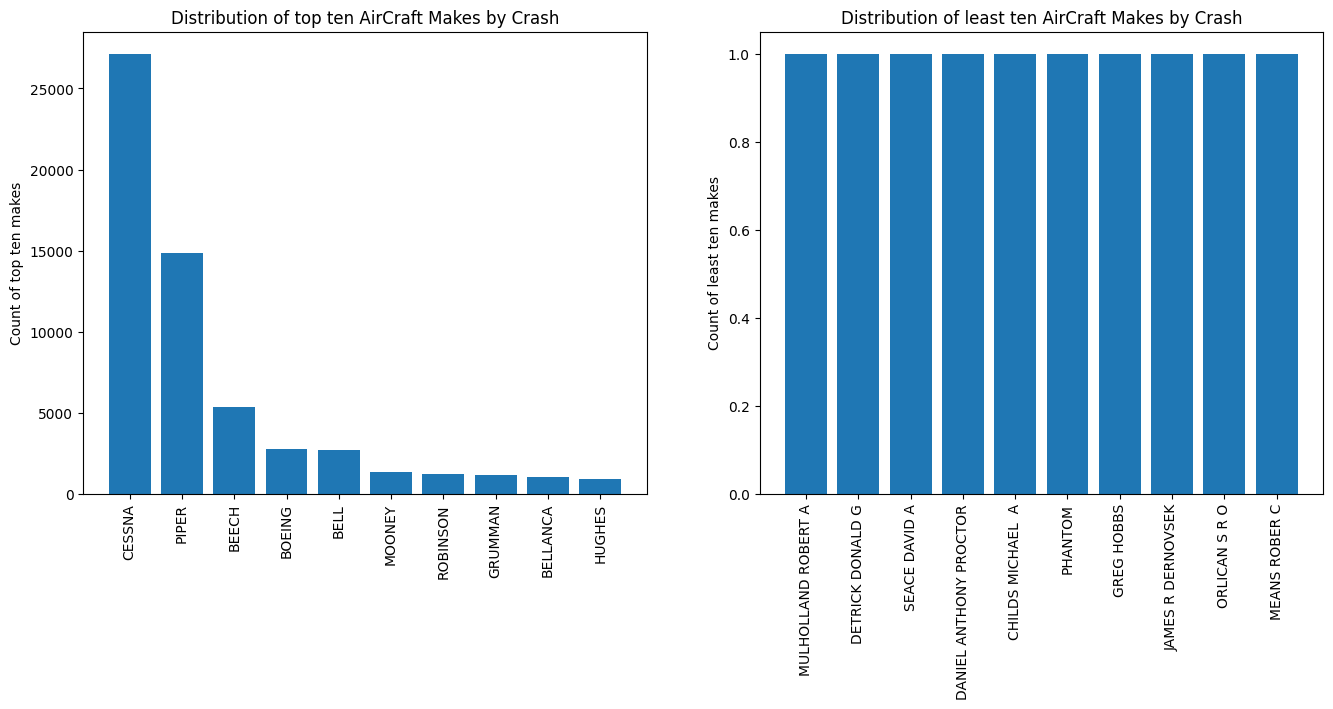

In [323]:

# Set up plots to show make with most crashes and leats 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

# Creating variables to use in plotting for ease of use
x1 = top_10_makes_name
height1 = top_10_makes_counts 

x2 = least_10_makes_name
height2 = least_10_makes_counts 


# Plot data
ax1.bar(x1,height1 )
ax2.bar(x2, height2)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Count of top ten makes")
ax2.set_ylabel("Count of least ten makes")
ax1.set_title("Distribution of top ten AirCraft Makes by Crash")
ax2.set_title("Distribution of least ten AirCraft Makes by Crash")

plt.show

Top ten aircrafts with the most accidents/inciendts is the CESSNA and PIPER, BEECH and BOEING 

Ten aircrafts with the least recorded number of cases MULHOLLAND ROBERT A, DETRICK DONAL G, and SEACE DAVID A 

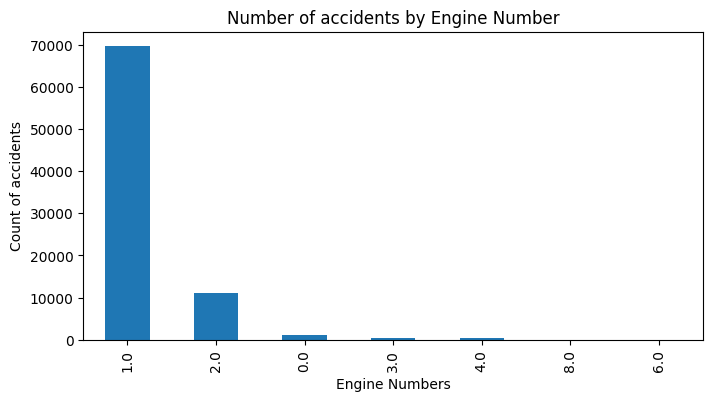

In [317]:
#caluclate the total number of accidents per engine number 
number_of_engines = aviation_data['Number.of.Engines'].value_counts()
number_of_engines.plot(kind = 'bar', ylabel= 'Count of accidents', xlabel= 'Engine Numbers', title= 'Number of accidents by Engine Number', figsize=(8,4));

From the graph most incidents/accidents happen on the aircraft with the least number of enignes and a gradual decline of accidents with crafts with multiple engines 

In [293]:
#Indentifying the date column to convert 
aviation_data['Event.Date']

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88884    2022-12-26
88885    2022-12-26
88886    2022-12-26
88887    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

In [294]:
#Show trend of accidents over the years 
#first we conevrt the dates using the to_date function and split the date to have years separate 
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Year'] = aviation_data['Event.Date'].dt.year
years = aviation_data[(aviation_data['Year'] >= 1981)]
years = aviation_data['Year'].value_counts()
years = years.sort_index()
years.head(10)


Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
Name: count, dtype: int64

<Axes: title={'center': 'Trend of accidents over the years 1948 - 2022'}, xlabel='Years', ylabel='Accidents/Incidents'>

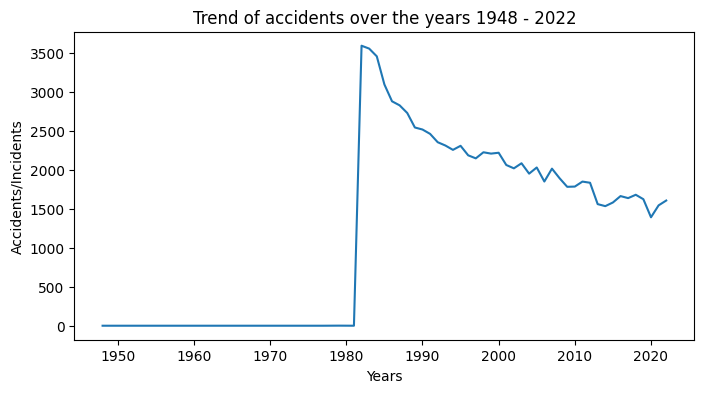

In [318]:
years.plot(kind = 'line' , xlabel='Years', ylabel= 'Accidents/Incidents', title= 'Trend of accidents over the years 1948 - 2022', figsize= (8,4))

The trend shows a decline in number of accidents/incidents over the years.
A sharp increase in number of accidents from 1982 was noted and a steady decrease after that

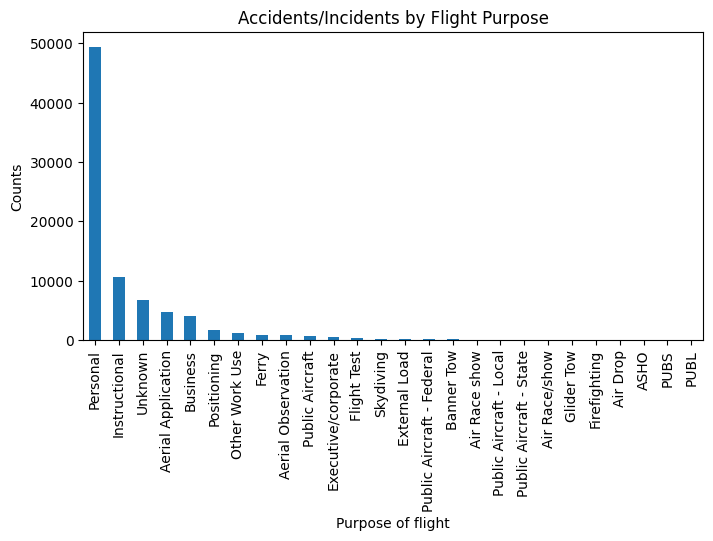

In [319]:
# show distirbution of accidents in regard to purpose of flight 
purpose_of_flights = aviation_data['Purpose.of.flight'].value_counts()
purpose_of_flights.plot(kind = 'bar', xlabel='Purpose of flight', ylabel= 'Counts', title= 'Accidents/Incidents by Flight Purpose',figsize=(8,4))
plt.show()

Majority of the flight accidents/incidents were caused by personal flights and instructional flights

In [305]:
#heat map showing occurnece of accidents incidents and 
# weather  and broad phase of flighte 
weather_data = aviation_data['Weather.Condition'].value_counts()
broadphase_data = aviation_data['Broad.phase.of.flight'].value_counts()

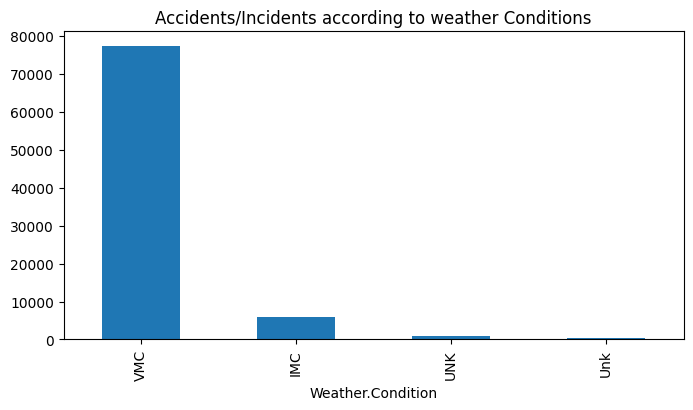

In [320]:
weather_data.plot(kind = 'bar', title= 'Accidents/Incidents according to weather Conditions', figsize=(8,4));

Almost all Accidnets/Incidents occur during VMC weather condition 

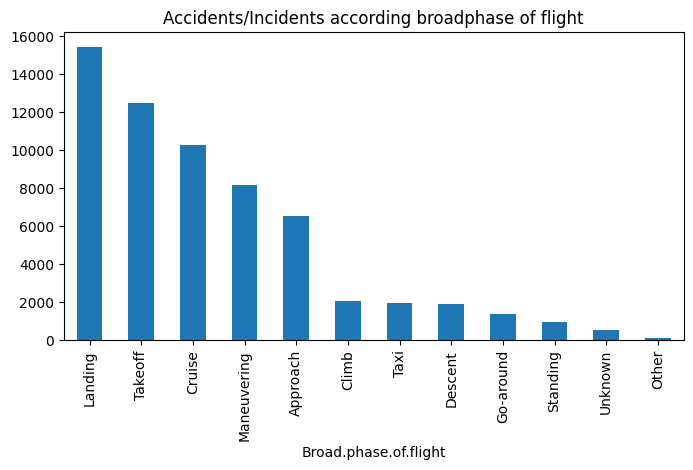

In [321]:
broadphase_data.plot(kind = 'bar', figsize= (8,4), title= 'Accidents/Incidents according broadphase of flight');


Shows that most incidents occur during landing and takeoff of the aircraft 

## Bivariate Analysis 

Show correlation between 
1. Fatality/Injuries and number of engines 

2. Fatality/Injuries and Year 



In [ ]:
#Showing cloumns so as to pick the correct ones 
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Tota Injuries', 'Year'],
      dtype='object')

In [299]:
#We first filter numeric data from the data set:otal Fatal Fatalities: Total Fatal Injuries: 1	
avaiation_numeric = aviation_data.loc[:,['Total.Fatal.Injuries', 'Tota Injuries' ,'Number.of.Engines', 'Year']]
avaiation_numeric.head()

,Total.Fatal.Injuries,Tota Injuries,Number.of.Engines,Year
0,2.0,0.0,1.0,1948
1,4.0,0.0,1.0,1962
2,3.0,NaN,1.0,1974
3,2.0,0.0,1.0,1977
4,1.0,NaN,NaN,1979


array([[<Axes: title={'center': 'Total.Fatal.Injuries'}>,
        <Axes: title={'center': 'Tota Injuries'}>],
       [<Axes: title={'center': 'Number.of.Engines'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

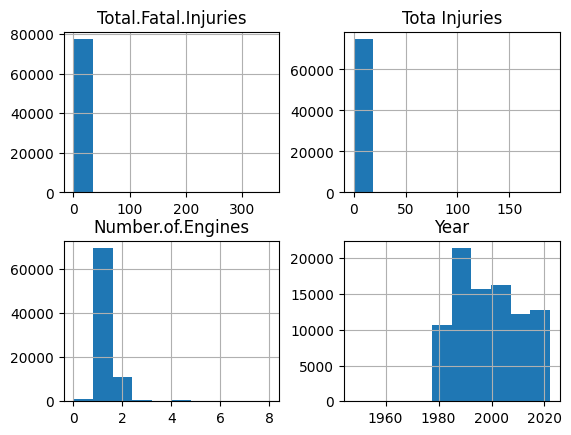

In [306]:
#plotting a histogram for the numeric data set 
avaiation_numeric.hist()

Analysing correlation of the numeric data filtered 

In [ ]:
#calculate correlation between the variables and accidents/incident occurence 
avaiation_corr = avaiation_numeric.corr()
avaiation_corr

,Total.Fatal.Injuries,Tota Injuries,Number.of.Engines,Year
Total.Fatal.Injuries,1.000000,0.098558,0.098505,0.017377
Tota Injuries,0.098558,1.000000,0.093308,-0.005714
Number.of.Engines,0.098505,0.093308,1.000000,-0.018393
Year,0.017377,-0.005714,-0.018393,1.000000


Total Fatal Injuries vs Total Injuries (0.0986): A weak positive correlation in that when total injuries increase, fatal injuries tend to increase slightly

Total Fatal Injuries vs Number of Engines (0.0985): A weak positive correlation showing that aircraft with more engines show slightly higher fatal injuries.This further analysis shows that although more accidents are recorded in aircrafts with less engines the chances of injury and death is less as compared to aircrafts with more engines 

Total Injuries , and Total Fatal Injuries vs Year is (-0.0057) and (0.0174) respectively : No meaningful correlation meaning total injuries or fatality haven't changed significantly over time.


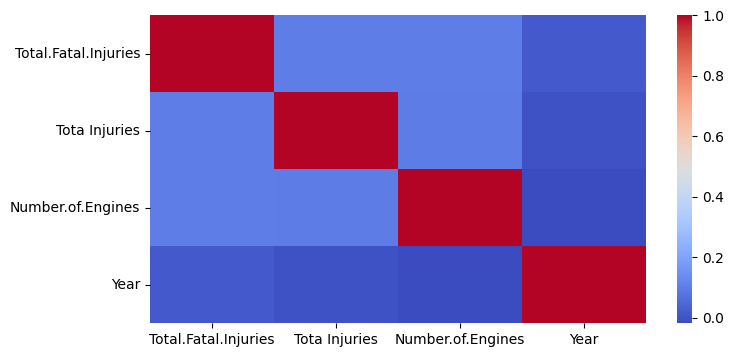

In [324]:
#showing the correlation using a heatmap
plt.figure(figsize = (8,4))

sns.heatmap(avaiation_corr, cmap = 'coolwarm')
plt.show()